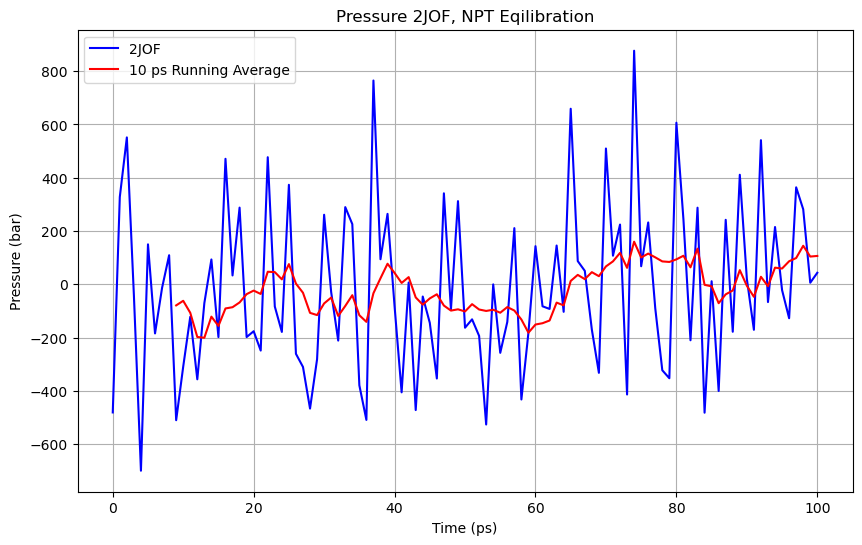

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the XVG file
def load_xvg(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        data_lines = [line for line in lines if not line.startswith(('#', '@'))]
    data = np.array([list(map(float, line.split())) for line in data_lines])
    return data

# Function to calculate running average
def running_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Example usage
filename = 'pressure.xvg'  # Make sure this path is correct
data = load_xvg(filename)

time = data[:, 0]         # First column for time
pressure = data[:, 1]     # Second column for pressure

# Calculate 10 ps running average
window_size = 10  # Size of the window for running average
avg_pressure = running_average(pressure, window_size)

# Adjust time for running average (shift left by window_size - 1)
avg_time = time[window_size - 1:]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(time, pressure, label='2JOF', color='blue')
plt.plot(avg_time, avg_pressure, label='10 ps Running Average', color='red')
plt.title('Pressure 2JOF, NPT Eqilibration')
plt.xlabel('Time (ps)')
plt.ylabel('Pressure (bar)')
plt.grid()
plt.legend()
plt.show()

# Save the plot (optional)
plt.savefig('pressure_vs_time_running_average.png')
